## 1- Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

## 2- Addressing Video

In [2]:
video_input_file_name = "videos/slow_traffic_small.mp4"

## 3- Creating Tracker Intance

In [3]:
# Set up tracker
tracker_types = ['BOOSTING', 'MIL','KCF', 'CSRT', 'TLD', 'MEDIANFLOW', 'GOTURN','MOSSE']

# Change the index to change the tracker type
tracker_type = tracker_types[3]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
elif tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif tracker_type == 'CSRT':
    tracker = cv2.legacy_TrackerCSRT.create()
elif tracker_type == 'TLD':
    tracker = cv2.legacy_TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()   
else:
    tracker = cv2.legacy_TrackerMOSSE.create()

## 4- Read Input Video & Setup Output Video

[[288 180 115  91]
 [363  78  44  41]
 [220 122  60  49]]


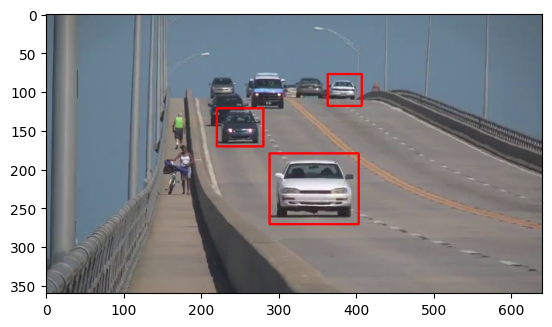

In [7]:
cap = cv2.VideoCapture(video_input_file_name)

# Read first frame
success, frame = cap.read()

bboxes = cv2.selectROIs('MultiTracker', frame)

print(bboxes)
cv2.destroyAllWindows()

frame_draw = frame.copy()
for box in bboxes:
    p1 = (int(box[0]), int(box[1]))
    p2 = (int(box[0] + box[2]), int(box[1] + box[3]))
    cv2.rectangle(frame_draw, p1, p2, (0,0,255), 2, 1)
    
plt.imshow(frame_draw[...,::-1])

## 5- Creating MultiTracker

In [8]:
#multiTracker = cv2.MultiTracker_create()
multiTracker = cv2.legacy.MultiTracker_create()

# Initialize MultiTracker 
for bbox in bboxes:
    multiTracker.add(tracker, frame, bbox)

## 6- Process Video and Track Objects

In [9]:
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # get updated location of objects in subsequent frames
    success, boxes = multiTracker.update(frame)

    # draw tracked objects
    for box in boxes:
        p1 = (int(box[0]), int(box[1]))
        p2 = (int(box[0] + box[2]), int(box[1] + box[3]))
        cv2.rectangle(frame, p1, p2, (0,0,255), 2, 1)

    # show frame
    cv2.imshow('MultiTracker', frame)


    # quit on ESC button
    if cv2.waitKey(1) & 0xFF == 27:  # Esc pressed
        break

cv2.destroyAllWindows()
cap.release()